In [1]:
#  importing important libraries
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from tensorflow.keras. models import Sequential 
from tensorflow. keras.layers import Dense 
from tensorflow.keras.layers import LSTM 
from tensorflow.keras.layers import Dropout 
from tensorflow. keras. layers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.metrics import mean_squared_error

In [2]:
# importing dataset
stock_data = pd.read_csv('https://raw.githubusercontent.com/ybezginova2016/ZAF036_DA_Top10SP500_StockRecommendation/Jay-Contribution/NFLX%20(1).csv', index_col='Date')
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-11,352.000000,358.980011,350.029999,358.859985,358.859985,5387300
2019-03-12,359.369995,360.130005,353.799988,356.269989,356.269989,5164600
2019-03-13,355.809998,362.480011,352.769989,361.209991,361.209991,6444100
2019-03-14,360.500000,363.839996,358.100006,358.820007,358.820007,5271400
2019-03-15,361.019989,364.000000,358.890015,361.459991,361.459991,8444500


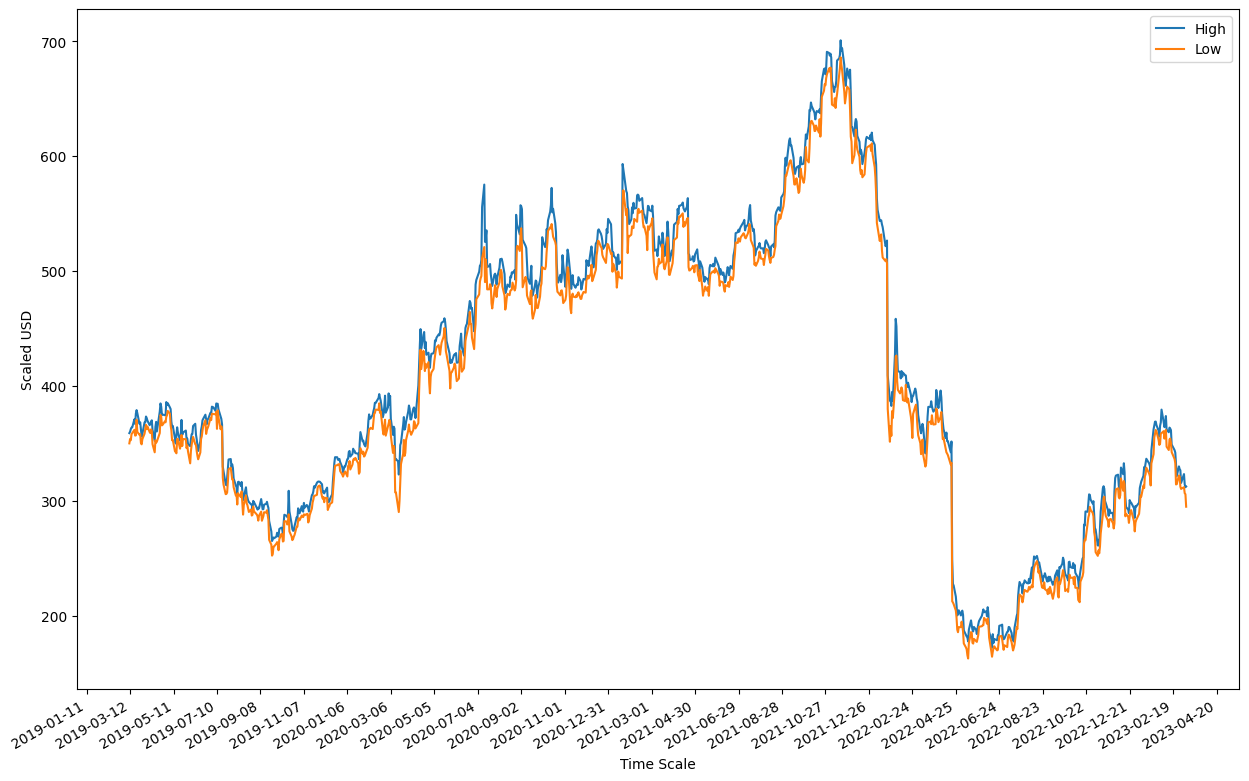

In [3]:
import matplotlib.dates as mdates
import datetime as dt
plt.figure(figsize=(15,10))
plt.gca().xaxis.set_major_formatter(mdates. DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in stock_data.index.values]

plt.plot(x_dates, stock_data['High'], label='High')
plt.plot(x_dates, stock_data['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt. legend ()
plt.gcf().autofmt_xdate()
plt.show()

In [4]:
# target_y = stock_data['Close']
X_feat = stock_data.iloc[:,0:4]

In [5]:
X_feat

,Open,High,Low,Close
Date,,,,
2019-03-11,352.000000,358.980011,350.029999,358.859985
2019-03-12,359.369995,360.130005,353.799988,356.269989
2019-03-13,355.809998,362.480011,352.769989,361.209991
2019-03-14,360.500000,363.839996,358.100006,358.820007
2019-03-15,361.019989,364.000000,358.890015,361.459991
...,...,...,...,...
2023-03-03,315.450012,317.489990,310.820007,315.179993
2023-03-06,317.000000,323.299988,311.839996,312.029999
2023-03-07,312.679993,314.299988,306.619995,308.470001


In [6]:
len(X_feat)

1008

In [7]:
def lstm_split (data, n_steps) :
  X, y = [], []
  for i in range(len(data)-n_steps+1):
    X.append(data[i:i+n_steps,:-1]) 
    y.append(data[i+n_steps-1,-1])
  return np.array(X), np.array (y)

In [8]:
X1, y1 = lstm_split(X_feat.values, n_steps=2)
print(y1.shape)
train_split=0.8
split_idx = int(np.ceil(len(X1)*train_split))
date_index = X_feat.index

X_train, X_test = X1[:split_idx], X1[split_idx: ]
y_train, y_test = y1[:split_idx], y1[split_idx:]
x_train_date, X_test_date = date_index[:split_idx], date_index[split_idx: ]
print(X1.shape, X_train.shape, X_test.shape, y_test.shape)

(1007,)
(1007, 2, 3) (806, 2, 3) (201, 2, 3) (201,)


In [9]:
model = Sequential()
model.add(LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4608      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,641
Trainable params: 4,641
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train, y_train,epochs=100, batch_size=4, verbose=1, shuffle=False)

Epoch 1/100
202/202 [==============================] - 2s 3ms/step - loss: 835.1146
Epoch 2/100
202/202 [==============================] - 1s 3ms/step - loss: 86.5255
Epoch 3/100
202/202 [==============================] - 1s 3ms/step - loss: 90.6160
Epoch 4/100
202/202 [==============================] - 1s 4ms/step - loss: 90.6486
Epoch 5/100
202/202 [==============================] - 1s 7ms/step - loss: 85.1931
Epoch 6/100
202/202 [==============================] - 1s 7ms/step - loss: 84.0274
Epoch 7/100
202/202 [==============================] - 1s 5ms/step - loss: 88.9120
Epoch 8/100
202/202 [==============================] - 1s 4ms/step - loss: 90.4812
Epoch 9/100
202/202 [==============================] - 1s 4ms/step - loss: 88.9642
Epoch 10/100
202/202 [==============================] - 1s 4ms/step - loss: 87.9050
Epoch 11/100
202/202 [==============================] - 1s 5ms/step - loss: 86.7204
Epoch 12/100
202/202 [==============================] - 1s 5ms/step - loss: 85.4195


In [11]:
y_pred_tr = model.predict(X_train,verbose=0)
print('RMSE for train:', np.sqrt(mean_squared_error(y_train,y_pred_tr)))

RMSE for train: 7.093490060889201


In [12]:
y_pred = model.predict(X_test,verbose=0)
print('RMSE for test:', np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE for test: 4.63750856913132


In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("/content/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/model.h5")